In [39]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('lung_cancer_EDA/Lung_cancer.csv')

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [31]:
# Show the first few rows of the dataset
print("\
First few rows of the dataset:")
(df.head())

First few rows of the dataset:


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,65,1,1,1,2,2,1,2,2,2,2,2,2,1,0
1,1,55,1,2,2,1,1,2,2,2,1,1,1,2,2,0
2,1,78,2,2,1,1,1,2,1,2,1,1,2,1,1,1
3,0,60,2,1,1,1,2,1,2,1,1,2,1,2,2,1
4,1,80,1,1,2,1,1,2,1,2,1,1,1,1,2,0


In [17]:
# Display summary statistics
print("\
Summary statistics:")
df.describe()

Summary statistics:


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [28]:
# Count the number of lung cancer cases
lung_cancer_count = df['LUNG_CANCER'].value_counts()
print("\
Lung cancer cases:")
(lung_cancer_count)

Lung cancer cases:


1    1518
0    1482
Name: LUNG_CANCER, dtype: int64

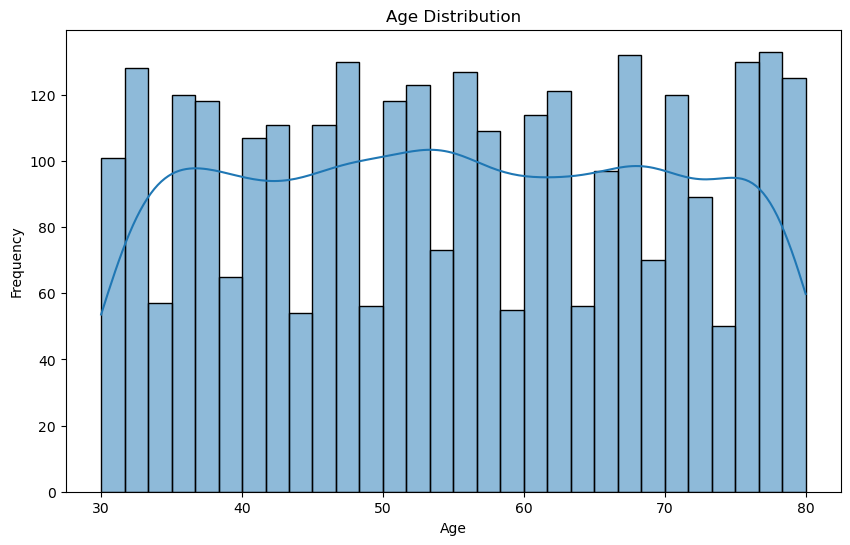

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


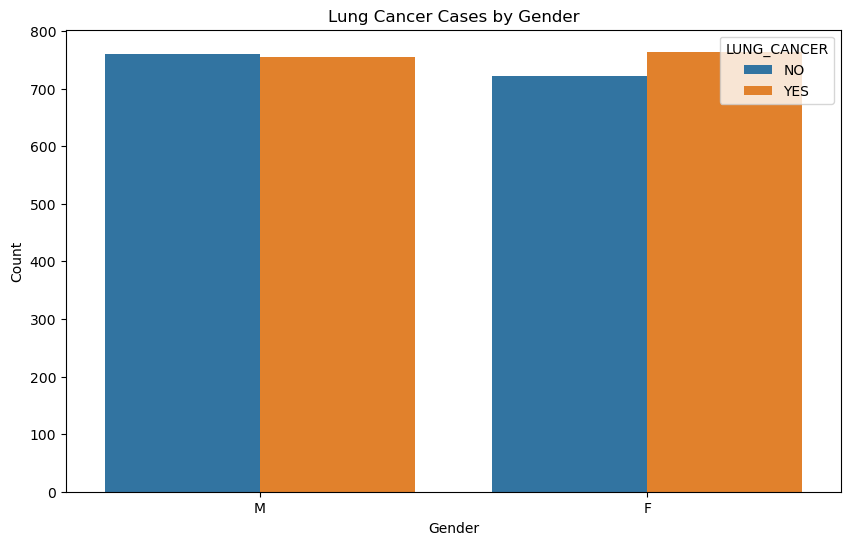

In [41]:
# Plotting the count of lung cancer cases by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df)
plt.title('Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_2920/2258879513.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


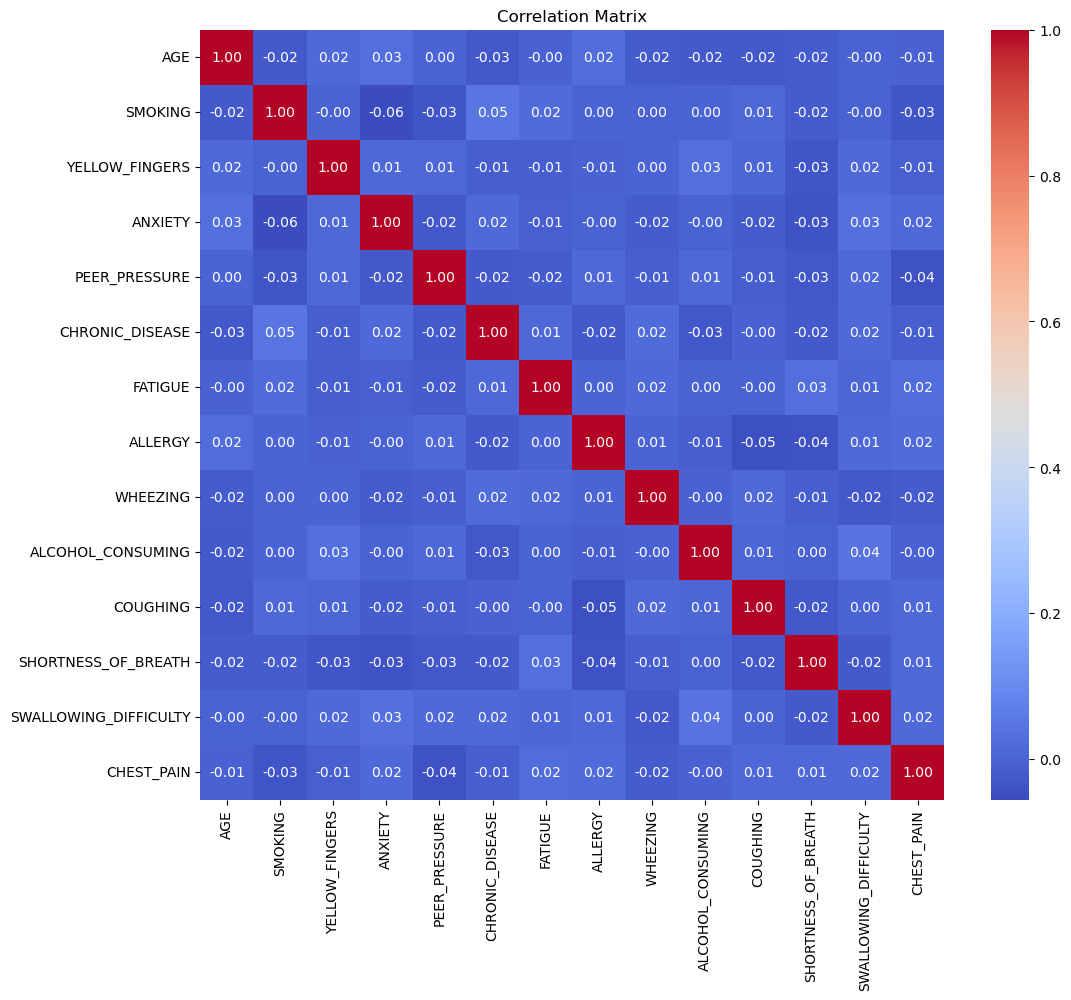

In [42]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [43]:
# Convert categorical variables to numeric
# Gender: M -> 0, F -> 1
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})
# Lung Cancer: NO -> 0, YES -> 1
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

# Display the first few rows of the cleaned dataset
df.head()

# Summary statistics
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.495333,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667,0.506000
std,0.500062,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082,0.500047
min,0.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [11]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Check for missing values
missing_values = df.isnull().sum()

In [12]:
# Print missing values
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


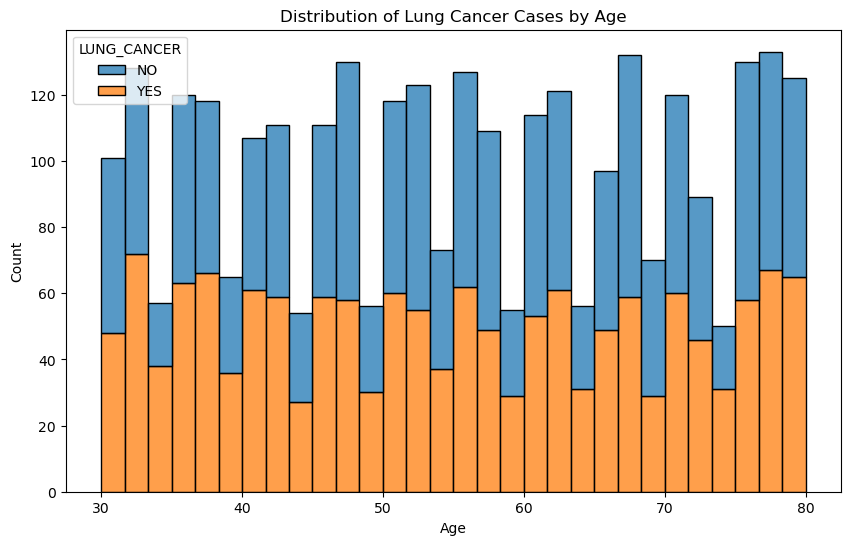

In [13]:
# Distribution of Lung Cancer cases by Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', hue='LUNG_CANCER', multiple='stack', bins=30)
plt.title('Distribution of Lung Cancer Cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('age_distribution_lung_cancer.png')
plt.show()

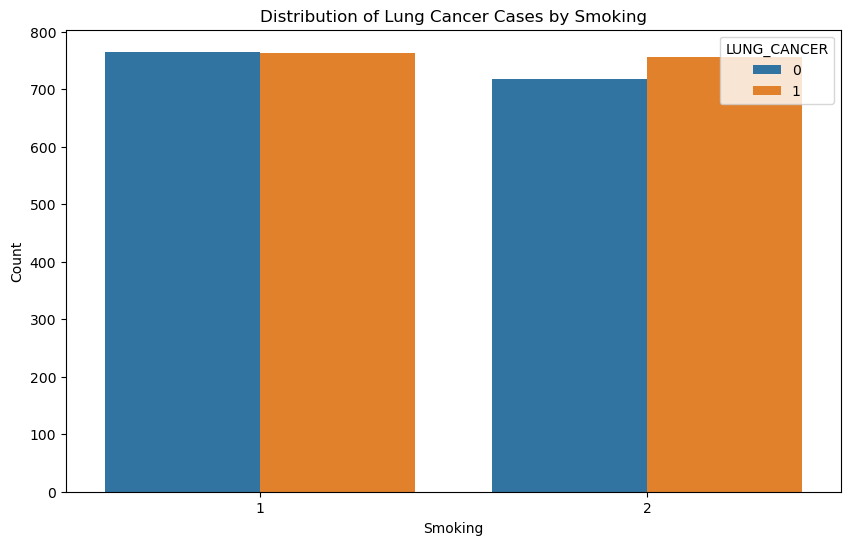

In [45]:
# Distribution of Lung Cancer cases by Smoking
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SMOKING', hue='LUNG_CANCER')
plt.title('Distribution of Lung Cancer Cases by Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.savefig('smoking_lung_cancer.png')
plt.show()

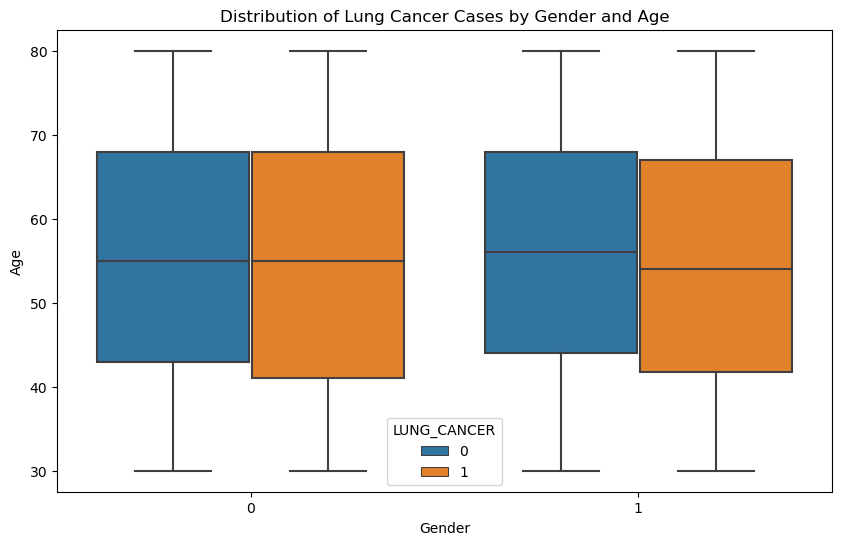

In [46]:
# Distribution of Lung Cancer cases by Gender and Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='GENDER', y='AGE', hue='LUNG_CANCER')
plt.title('Distribution of Lung Cancer Cases by Gender and Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.savefig('gender_age_lung_cancer.png')
plt.show()

In [16]:
# Print done message
print("Additional analysis completed.")

Additional analysis completed.
